In [31]:
import numpy
import numpy as np
import pandas
import pandas as pd
import os
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.spatial.distance import cityblock
#from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans

inline_rc = dict(mpl.rcParams)

CARGAMOS LOS DATOS DE yelp_academic_dataset_review.json

In [32]:

reviews = []
with open('data/yelp_academic_dataset_review.json') as fl:
    i=0
    for review in fl:
        reviews.append(json.loads(review))
        i+=1
        if i + 1 > 1000:
            break

df_review = pd.DataFrame(reviews)
print(df_review.head())

"""

df_review = pd.read_csv('data/yelp_reviews.csv')
print(df_review)

"""

                review_id                 user_id             business_id  \
0  Q1sbwvVQXV2734tPgoKj4Q  hG7b0MtEbXx5QzbzE6C_VA  ujmEBvifdJM6h6RLv4wQIg   
1  GJXCdrto3ASJOqKeVWPi6Q  yXQM5uF2jS6es16SJzNHfg  NZnhc2sEQy3RmzKTZnqtwQ   
2  2TzJjDVDEuAW6MR5Vuc1ug  n6-Gk65cPZL6Uz8qRm3NYw  WTqjgwHlXbSFevF32_DJVw   
3  yi0R0Ugj_xUx_Nek0-_Qig  dacAIZ6fTM6mqwW5uxkskg  ikCg8xy5JIg_NGPx-MSIDA   
4  11a8sVPMUFtaC7_ABRkmtw  ssoyf2_x0EQMed6fgHeMyQ  b1b1eb3uo-w561D0ZfCEiQ   

   stars  useful  funny  cool  \
0    1.0       6      1     0   
1    5.0       0      0     0   
2    5.0       3      0     0   
3    5.0       0      0     0   
4    1.0       7      0     0   

                                                text                 date  
0  Total bill for this horrible service? Over $8G...  2013-05-07 04:34:36  
1  I *adore* Travis at the Hard Rock's new Kelly ...  2017-01-14 21:30:33  
2  I have to say that this office really has it t...  2016-11-09 20:09:03  
3  Went in for a lunch. Steak sand

"\n\ndf_review = pd.read_csv('data/yelp_reviews.csv')\nprint(df_review)\n\n"

CARGAMOS LOS DATOS DE yelp_academic_dataset_business.json

In [33]:
'''business = []
with open('data/yelp_academic_dataset_business.json') as fl:
    for i, line in enumerate(fl):
        business.append(json.loads(line))

df_business = pd.DataFrame(business)
print(df_business.head())
'''


"business = []\nwith open('data/yelp_academic_dataset_business.json') as fl:\n    for i, line in enumerate(fl):\n        business.append(json.loads(line))\n\ndf_business = pd.DataFrame(business)\nprint(df_business.head())\n"

ELIMINAMOS LAS COLUMNAS INNECESARIAS

COMPROBAMOS

In [34]:
df_review = df_review.drop(["review_id", "user_id","business_id", "useful", "funny", "cool", "date","stars"], axis=1)
#df_business = df_business.drop(["name", "address", "city", "state", "postal_code", "latitude", "longitude", "stars", "review_count", "is_open", "attributes", "hours"], axis=1)

In [35]:
print(df_review.head())
print(df_review.tail())
#print(df_business.head())

                                                text
0  Total bill for this horrible service? Over $8G...
1  I *adore* Travis at the Hard Rock's new Kelly ...
2  I have to say that this office really has it t...
3  Went in for a lunch. Steak sandwich was delici...
4  Today was my second out of three sessions I ha...
                                                  text
995  We ate there yesterday for the first time. My ...
996  I have never waited LESS THAN forty five minut...
997  I am short. Pants are always waaaay too long. ...
998  Great ambiance, great food, although their pol...
999  Excellente place que vous passiez juste prendr...


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction import text


vectorizer = TfidfVectorizer()
lemma = WordNetLemmatizer()
sw = [lemma.lemmatize(w) for w in text.ENGLISH_STOP_WORDS]

X = []
for r in df_review["text"]: #Por cada review
    txt = word_tokenize(r.lower()) #Separa la review en palabras
    newtxt = ""
    for w in txt: #Por cada palabra en txt
        if w not in sw:
            l = lemma.lemmatize(w) #se hace lo de quitar mayusculas y quitar raice y eso
            newtxt += l+" "
    X.append(newtxt)

X = vectorizer.fit_transform(X)
bow = vectorizer.get_feature_names()
print(X)

  (0, 1785)	0.17309064664008175
  (0, 2511)	0.26401038633445817
  (0, 3480)	0.24917490666463168
  (0, 624)	0.18792612630990824
  (0, 1309)	0.23864896632627483
  (0, 38)	0.24917490666463168
  (0, 4862)	0.1857079444578493
  (0, 1377)	0.17976157268303555
  (0, 5211)	0.49834981332926337
  (0, 140)	0.24917490666463168
  (0, 1350)	0.15928590540905854
  (0, 4701)	0.23048441269940215
  (0, 240)	0.1441036099209999
  (0, 1877)	0.26401038633445817
  (0, 162)	0.26401038633445817
  (0, 6237)	0.08007249212325494
  (0, 3474)	0.1746478516420403
  (0, 7265)	0.1762742880646082
  (1, 750)	0.08329759954699617
  (1, 2717)	0.040712855387830586
  (1, 4270)	0.03345614253756811
  (1, 7569)	0.04347064428346753
  (1, 7192)	0.024637427116908656
  (1, 6390)	0.06168935297471295
  (1, 1984)	0.03450266442250089
  :	:
  (999, 2574)	0.12798437836807078
  (999, 4865)	0.12079257932676514
  (999, 613)	0.12079257932676514
  (999, 6536)	0.12079257932676514
  (999, 2371)	0.111731984079949
  (999, 7649)	0.3470697501054846
  (

C:\Users\Aitor Arana\.conda\envs\TrabajoMineria\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [37]:
X = X.toarray()
X = pd.DataFrame(X)

In [38]:
from sklearn.decomposition import PCA
from scipy.spatial.distance import cityblock
from scipy.spatial import distance

def createDistanceMatrix(samples, numAtributes, distanceType):

    pca = PCA(n_components=numAtributes)
    pca.fit(samples)
    samples = pca.transform(samples)

    distance_matrix = np.zeros((len(samples),len(samples)))
    terminado = False
    i = 0
    j = 0
    for i in range(distance_matrix.shape[0]):
        for j in range(i,distance_matrix.shape[0]):
            if i!=j:
                if (distanceType == 'manhattan'):
                    distancia = float(cityblock(samples[i],samples[j]))
                elif(distanceType == 'euclidean'):
                    distancia = float(distance.euclidean(samples[i],samples[j]))
                else:
                    distancia = float(distance.minkowski(samples[i],samples[j]))
                distance_matrix[i,j] = distancia #Meto en la matriz la distancia do vece
                distance_matrix[j,i] = distancia
            elif i == j:
                distance_matrix[i,j] = 10**4 #Pone un valor muy grande para que nunca salga como la distancia más pequeña entrela misma instancia
    distance_matrix = pd.DataFrame(distance_matrix)
    return distance_matrix

def calculateMin(distance_matrix):
    minimumValues=np.matrix(distance_matrix).argmin(axis = 1).tolist()
    minn=distance_matrix.iloc[minimumValues[0][0],0]
    y=0
    x=minimumValues[0][0]

    for i in range(1,len(minimumValues)-1):
        if distance_matrix.iloc[minimumValues[i][0],i] < minn:
            minn=distance_matrix.iloc[minimumValues[i][0],i]
            x=minimumValues[i][0]
            y=i

    return x,y,minn

def mergeClusters(distance_matrix,newValues,x,y):

        if x>y:
            label = str(distance_matrix.columns[y]) + '-' + str(distance_matrix.columns[x])
            distance_matrix = distance_matrix.drop([distance_matrix.iloc[x].name], axis=1) #Quito las filas y columnas de las instancias que se han mergeado
            distance_matrix = distance_matrix.drop([distance_matrix.iloc[x].name], axis=0)
            distance_matrix = distance_matrix.rename({distance_matrix.iloc[y].name:  label}, axis='columns')
            distance_matrix = distance_matrix.rename({distance_matrix.iloc[y].name:  label}, axis='rows')
        else:
            label = str(distance_matrix.columns[y]) + '-' + str(distance_matrix.columns[x])
            distance_matrix = distance_matrix.drop([distance_matrix.iloc[y].name], axis=1) #Quito las filas y columnas de las instancias que se han mergeado
            distance_matrix = distance_matrix.drop([distance_matrix.iloc[y].name], axis=0)
            distance_matrix = distance_matrix.rename({distance_matrix.iloc[x].name:  label}, axis='columns')
            distance_matrix = distance_matrix.rename({distance_matrix.iloc[x].name:  label}, axis='rows')

        distance_matrix.loc[label]=newValues
        distance_matrix.loc[:, label]=newValues

        return distance_matrix

In [39]:
def completeLink(node1,node2,minn,lenMatrix):
    deleted = False
    newValues = []
    for i in range(0,lenMatrix):
        if((node1[i] == minn or node2[i] == minn) and not deleted):
            newValues.append(float(10**4))
            deleted = True
        elif((node1[i] == minn or node2[i] == minn) and deleted):
            pass
        elif(node1[i]>=node2[i]):
                newValues.append(float(node1[i]))
        else:
                newValues.append(float(node2[i]))

    return newValues

def singleLink(node1,node2,minn,lenMatrix):
    deleted = False
    newValues = []
    for i in range(0,lenMatrix):
        if((node1[i] == minn or node2[i] == minn) and not deleted):
            newValues.append(float(10**4))
            deleted = True
        elif((node1[i] == minn or node2[i] == minn) and deleted):
            pass
        elif(node1[i]<=node2[i]):
                newValues.append(float(node1[i]))
        else:
                newValues.append(float(node2[i]))

    return newValues

def averageLink(node1,node2,minn,lenMatrix):
    deleted = False
    newValues = []
    for i in range(0,lenMatrix):
        if((node1[i] == minn or node2[i] == minn) and not deleted):
            newValues.append(float(10**4))
            deleted = True
        elif((node1[i] == minn or node2[i] == minn) and deleted):
            pass

        else:
                newValues.append((node1[i]+node2[i])/2)

    return newValues

In [40]:
def hierarchicalClustering(distance_matrix,linkType, nClusters):

    print(distance_matrix)

    for samples in range(1, len(distance_matrix)-nClusters+1):
        print('-----------------------------')
        print('iteración número:', samples)

        x,y,minn = calculateMin(distance_matrix)

        node1 = distance_matrix.iloc[y].array
        node2 = distance_matrix.iloc[x].array

        if linkType == 'single':
            newValues = singleLink(node1,node2,minn,len(distance_matrix))
        elif linkType == 'complete':
            newValues = completeLink(node1,node2,minn,len(distance_matrix))
        elif linkType == 'average':
            newValues = averageLink(node1,node2,minn,len(distance_matrix))

        distance_matrix = mergeClusters(distance_matrix,newValues,x,y)


        #print('La matriz de distancias después de la iteración', samples)
        #print(distance_matrix)
        #print('-----------------------------')

    return distance_matrix

In [41]:
linkType = 'average'
distanceType = 'euclidean'
nClusters = 4
distance_matrix = hierarchicalClustering(createDistanceMatrix(X, 5, distanceType), linkType, nClusters)
distance_matrix

              0             1             2             3             4    \
0    10000.000000      0.081009      0.110676      0.292236      0.260895   
1        0.081009  10000.000000      0.152116      0.257245      0.198006   
2        0.110676      0.152116  10000.000000      0.346484      0.308056   
3        0.292236      0.257245      0.346484  10000.000000      0.310179   
4        0.260895      0.198006      0.308056      0.310179  10000.000000   
..            ...           ...           ...           ...           ...   
995      0.352443      0.298976      0.423110      0.187735      0.317324   
996      0.075889      0.095520      0.152815      0.336846      0.247509   
997      0.034867      0.104947      0.098966      0.315350      0.275189   
998      0.228021      0.223576      0.296835      0.145550      0.351859   
999      0.057703      0.121453      0.144403      0.300618      0.302668   

          5         6         7         8         9    ...       990  \
0  

,0-81-272-895-997-288-737-614-786-657-767-133-435-794-885-179-890-666-873-807-740-328-310-319-380-948-996-561-735-668-971-393-182-869-559-428-455-958-681-620-387-89-119-739-367-632-601-990-158-2-560-577-205-281-396-616-107-143-842-702-784-358-1-210-164-456-299-673-738-134-382-819-691-907-327-395-693-793-130-925-548-884-900-485-216-622-361-888-946-42-935-344-670-963-25-105-933-805-581-685-189-397-674-734-983-13-92-287-565-399-732-825-302-447-633-178-274-934-801-110-956-113-180-301-815-151-152-348-736-694-154-839-939-49-386-540-724-848-363-404-497-437-642-915-564-587-960-77-212-118-775-471-511-543-170-172-994-713-473-892-913-949-106-438-533-410-804-930-973-568-149-893-424-675-858-938-108-761-822-992-297-433-569-414-707-422-845-165-544-292-980-330-563-729-235-466-778-464-250-638-371-672-336-407-928-440-18-23-76-823-859-970-536-592-468-836-475-21-525-676-384-731-538-117-195-901-220-244-887-366-820-83-663-141-710-723-766-41-599-326-627-986-155-296-463-368-711-918-341-512-372-712-157-796-232-241-499-394-181-61-80-878-33-755-356-303-532-762-651-131-999-293-608-800-139-756-458-142-515-576-876-862-959-477-54-243-99-264-750-831-342-555-36-945-665-211-338-972-262-334-860-720-558-942-47-443-494-135-595-67-245-228-967-349-253-645-476-300-725-132-643-662-146-260-185-671-234-537-402-802-66-369-771-188-230-329-409-121-321-526-160-193-227-423-843-462-73-611-984-516-714-753-864-852-541-653-231-378-851-161-16-795-129-359-493-200-882-98-145-780-747-454-824-483-730-954-492-506-97-728-846-550-579-582-208-291-388-542-392-498-478-490-218-785-998-221-546-20-24-251-507-373-451-68-943-432-236-530-529-294-337-43-909-591-524-51-187-350-625-45-623-86-660-838-128-276-857-345-346-459-259-304-513-254-379-647-203-50-911-53-240-629-306-722-897-263-314-377-495-752-74-91-166-517-419-818-3-196-690-27-403-718-937-870-30-37-947-64-594-646-103-252-265-745-879-246-865-659-964-347-441-669-658-323-826-902-932-924-12-460-635-290-706-504-699-886-417-472-837-896-617-35-183-976-390-401-406-664-62-743-968-268-593-549-224-518-744-17-85-982-192-981-944-217-995-271-619-689-434-370-929-19-184-781-621-746-748-353-692-450-457-920-991-727-684-55-385-269-776-519-147-522-609-654-237-59-233-339-351-551-829-144-322-777-214-411-239-573-827-360-630-640-479-6-993-469-880-22-8-39-508-256-465-266-375-439-14-194-215-661-696-652-289-503-480-412-682-704-789-523-552-96-127-225-578-318-683-636-749-835-40-413-436-957-985-277-308-606-7-311-56-810-138-700-400-566-109-238-717-453-953-486-162-335-574-863-10-759-950-111-847-275-534-198-482-177-955-688-719-903-72-936-875-912-931-116-787-273-698-352-415-849-364-28-567-871-908-71-78-320-122-877-168-191-309-791-421-650-634-965-828-974-355-641-9-488-798-190-721-910-590-213-528-261-612-58-514-656-60-123-150-680-697-305-365-906-520-812-975-270-866-899-951-340-556-615-779-84-307-969-605-814-531-602-853-431-695-904-677-171-219-557-797-362-914-201-32-75-502-94-765-312-966-357-381-90-206-816-821-830-115-626-452-202-283-449-426-921-988-248-535-760-772-596-989-125-758-813-583-589-420-176-716-331-505-774-575-637-470-648-15-496-295-489-703-867-941-840-919-204-258-474-120-799-856-598-811-4-31-257-570-709-70-527-136-242-374-26-114-153-405-792-38-87-809-102-868-881-940-952-770-872-52-547-63-467-391-173-977-69-159-398-917-140-167-279-317-889-644-325-603-883-444-554-979-961-773-333-446-11-29-742-57-586-923-332-639-487-186-649-572-588-223-286-343-987-808-855-79-430-610-631-806-894-65-169-833-93-389-927-584-803-112-628-509-733-891-100-313-562-207-282-501-418-905-916-316-850-280-788-687-553-597-667-962-922-5-571-624-708-425-521-104-354-741-445-817-148-209-763-34-175-764-82-604-124-484-790-461-284-726-229-408-782-324-715-427-926,44,46-156-376-701-199-783-539-545-163-298-174-249-874-255-898-580-607-978-197-222-481-500-678-285-448-613-769-510,48-101-226-88-383-768-618-705-416-491-600-834-137-278-429-754-854-247-861-679-686-95-655-315-844-832-126-841-442-757-751-267-585
0-81-272-895-997-288-737-614-786-657-767-133-435-794-885-179-890-666-873-807-740-328-310-319-380-948-996-561-

In [42]:
centroids = []
for label in distance_matrix.columns:
    label = str(label).split('-')
    centroid = X.iloc[int(label.pop())]
    for i in label:
        newInstance = X.iloc[int(i)]
        for atr in range(0, len(centroid)):
            centroid[atr] = ((centroid[atr] + newInstance[atr])/2)

    centroids.append(centroid)

centroids = pd.DataFrame(centroids)

print(centroids)


         0             1             2             3             4     \
926  0.000751  8.925471e-21  9.120716e-27  1.267647e-88  7.455561e-39   
44   0.000000  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
510  0.000008  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
585  0.000000  1.293401e-07  0.000000e+00  0.000000e+00  0.000000e+00   

             5             6             7             8         9     ...  \
926  4.197037e-28  5.689715e-15  3.705325e-28  1.515705e-02  0.003061  ...   
44   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000  ...   
510  0.000000e+00  0.000000e+00  0.000000e+00  2.469543e-06  0.000000  ...   
585  0.000000e+00  0.000000e+00  0.000000e+00  1.212694e-08  0.000000  ...   

         7947           7948      7949          7950           7951  \
926  0.000002  7.338299e-128  0.000000  3.390156e-59  5.633448e-173   
44   0.000000   0.000000e+00  0.000000  0.000000e+00   0.000000e+00   
510  0.000000   0.000000e+00  

In [43]:
# Visualizacion de los clusters

for n in range(0, nClusters):
    cluster = centroids.iloc[n].to_list()
    clusterSort = np.sort(cluster)
    relWords = []
    for i in range(1, 15):
        value = clusterSort[len(cluster)-i]
        relWords.append(bow[cluster.index(value)])

    print('Palabras relevantes del topico ' + str(list(centroids.index.values)[n]) + ': ')
    print(relWords)
    print('-----------------------------------------------------------------------------')


Palabras relevantes del topico 926: 
['drive', 'minute', 'line', 'order', 'table', 'said', 'speaker', 'waited', 'wa', 'inside', 'got', 'shut', 'went', 'seated']
-----------------------------------------------------------------------------
Palabras relevantes del topico 44: 
['wa', 'buffet', 'cold', 'food', 'end', 'server', 'did', 'chief', 'bellagio', 'bellagio', 'bellagio', 'suppose', 'freshly', 'forgot']
-----------------------------------------------------------------------------
Palabras relevantes del topico 510: 
['great', 'wonderful', 'yoli', 'food', 'snack', 'leaf', 'receive', 'neighborhood', 'breakfast', 'nice', 'price', 'finish', 'size', 'center']
-----------------------------------------------------------------------------
Palabras relevantes del topico 585: 
['pizza', 'cheesy', 'drool', 'mentor', 'leftover', 'goodness', 'smell', 'soft', 'hand', 'bread', 'delicious', 'order', 'onion', 'manager']
-----------------------------------------------------------------------------


In [44]:
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X)
# Cambio de base a dos dimensiones PCA
X = pca.transform(X)

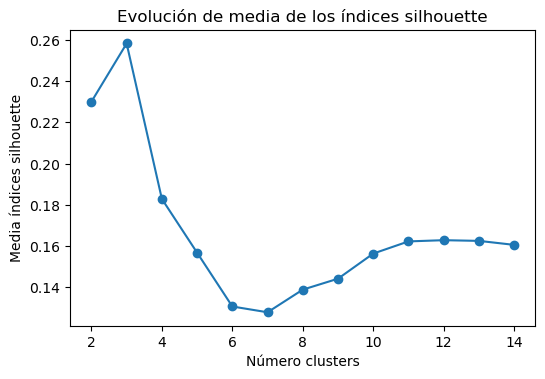

In [45]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Método silhouette para identificar el número óptimo de clusters
# ==============================================================================
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo = AgglomerativeClustering(
                    affinity   = 'euclidean',
                    linkage    = 'ward',
                    n_clusters = n_clusters
             )

    cluster_labels = modelo.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)

fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Evolución de media de los índices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

In [46]:
import plotly.figure_factory as ff
import numpy as np

fig = ff.create_dendrogram(X)
fig.update_layout(width=1300, height=1000)
fig.show()